In [47]:
import math
import os
import random

import numpy as np
import matplotlib.pyplot as plt
import mlx.core as mx

from main import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
X_train, y_train, X_test, y_test = load_donut(ntrain=32)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (32, 2)
Training labels shape:  (32,)
Test data shape:  (8, 2)
Test labels shape:  (8,)


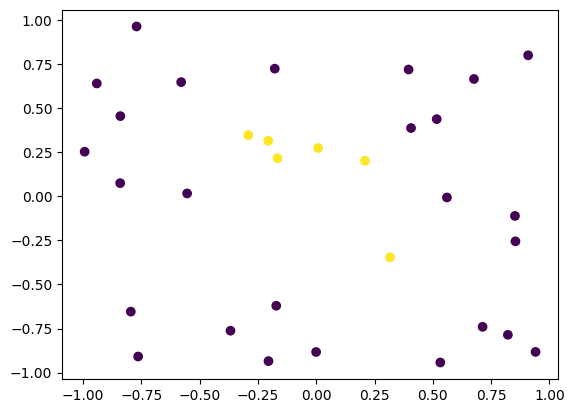

In [42]:
fig, ax = plt.subplots()

X = X_train[:, 0]
Y = X_train[:, 1]

ax.scatter(X, Y, c=y_train)

In [ ]:
# TODO: Prepro, split into validation

In [ ]:
from typing import TypedDict

class Foo(TypedDict):
    x: int
    y: int

foo = Foo(x=1, y=2)

foo

{'x': 1, 'y': 2}